In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install easyocr

In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

### 1. Read image or video

In [2]:
image_path = 'testocr.png'

In [16]:
ip = 'surf.jpeg'

In [5]:
image_2_path = 'ocr_orig.png'

In [10]:
bbd_path = 'bbd.jpg'

In [4]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image_path)
result

Using CPU. Note: This module is much faster with a GPU.


[([[33, 84], [587, 84], [587, 127], [33, 127]],
  'This is a lot of 12 point text to test the',
  0.7515471782474253),
 ([[31, 121], [485, 121], [485, 157], [31, 157]],
  'ocr code and see if it works on',
  0.9301597694063997),
 ([[495, 123], [625, 123], [625, 163], [495, 163]],
  'all types',
  0.9978408899985456),
 ([[31, 154], [227, 154], [227, 191], [31, 191]],
  'of file format:',
  0.7233347825715364),
 ([[32, 184], [592, 184], [592, 233], [32, 233]],
  'The quick brown dog jumped over the',
  0.8490545594595839),
 ([[29, 220], [591, 220], [591, 265], [29, 265]],
  'lazy fox The quick brown dog jumped',
  0.8124401513857913),
 ([[31, 255], [605, 255], [605, 299], [31, 299]],
  'over the lazy fox. The quick brown dog',
  0.8062025197001981),
 ([[39, 287], [568, 287], [568, 332], [39, 332]],
  'jumped over the lazy fox. The quick',
  0.5960078814476353),
 ([[32, 321], [568, 321], [568, 369], [32, 369]],
  'brown dog jumped over the lazy fox.',
  0.7642401091508723)]

In [ ]:
import time
start_time = time.time()
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image_path)
result
print("--- %s seconds ---" % (time.time() - start_time))

In [17]:
import time
start = time.time()

reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(ip)
result
    
end = time.time()
 
# print the difference between start 
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

Using CPU. Note: This module is much faster with a GPU.


The time of execution of above program is : 2787.6949310302734 ms


In [18]:
result

[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9862082004547119)]

In [20]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

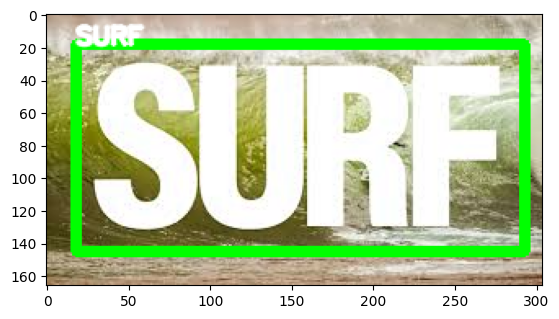

In [21]:
img = cv2.imread(ip)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0),5)
img = cv2.putText(img, text, top_left, font, .5, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [ ]:
##### OUT of SERVICE

In [22]:
oos_path = 'out-of-service.jpg'

In [24]:
import time
start = time.time()

reader = easyocr.Reader(['en'], gpu=False)
result_oos = reader.readtext(oos_path)
result_oos
    
end = time.time()
 
# print the difference between start 
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

Using CPU. Note: This module is much faster with a GPU.


The time of execution of above program is : 36318.5453414917 ms


### 3-Multiple line

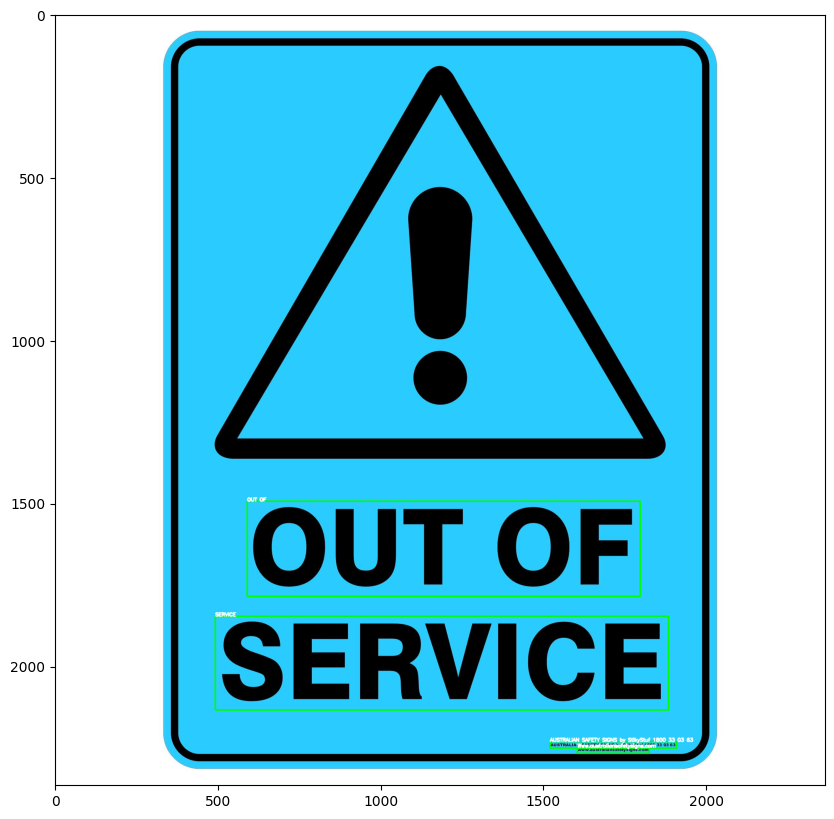

In [43]:
img = cv2.imread(oos_path)
for detection in result_oos:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0), 3)
    img = cv2.putText(img, text, top_left, font, .5, (255,255,255), 2, cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()